In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    f1_score,
    confusion_matrix,
    average_precision_score
)

from imblearn.over_sampling import SMOTE

sns.set_theme(style="whitegrid")


In [33]:
# Load feature-engineered dataset
df = pd.read_csv("../data/processed/fraud_processed.csv")

df.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,age,ip_address,class,ip_address_int,lower_bound_ip_address,...,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Viet Nam,country_Virgin Islands (U.S.),country_Yemen,country_Zambia,country_Zimbabwe
0,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,0.549607,KIXYSVCHIPQBR,-0.363124,1.677886e+07,0,16778864,16778240.0,...,False,False,False,False,False,False,False,False,False,False
1,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,-1.197335,PKYOWQKWGJNJI,0.101168,1.684205e+07,0,16842045,16809984.0,...,False,False,False,False,False,False,False,False,False,False
2,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,0.385831,LVCSXLISZHVUO,-0.479197,1.684366e+07,0,16843656,16843264.0,...,False,False,False,False,False,False,False,False,False,False
3,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,0.986342,UHAUHNXXUADJE,-0.363124,1.693873e+07,0,16938732,16924672.0,...,False,False,False,False,False,False,False,False,False,False
4,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,0.767974,XPGPMOHIDRMGE,0.449387,1.697198e+07,0,16971984,16941056.0,...,False,False,False,False,False,False,False,False,False,False


In [34]:
X = df.drop(columns=["class"])
y = df["class"]

print("Class distribution:")
print(y.value_counts(normalize=True))


Class distribution:
class
0    0.905007
1    0.094993
Name: proportion, dtype: float64


In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest distribution:")
print(y_test.value_counts(normalize=True))


Training distribution:
class
0    0.90501
1    0.09499
Name: proportion, dtype: float64

Test distribution:
class
0    0.904994
1    0.095006
Name: proportion, dtype: float64


In [36]:
cols_to_drop = [
    "signup_time",
    "purchase_time",
    "device_id",
    "user_id"
]

X_train = X_train.drop(columns=cols_to_drop, errors="ignore")
X_test  = X_test.drop(columns=cols_to_drop, errors="ignore")


In [37]:
X_train.dtypes


purchase_value                   float64
age                              float64
ip_address                       float64
ip_address_int                     int64
lower_bound_ip_address           float64
                                  ...   
country_Viet Nam                    bool
country_Virgin Islands (U.S.)       bool
country_Yemen                       bool
country_Zambia                      bool
country_Zimbabwe                    bool
Length: 196, dtype: object

In [38]:
X_train.dtypes.value_counts()


bool       187
float64      6
int64        3
Name: count, dtype: int64

In [39]:
smote = SMOTE(random_state=42)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("After SMOTE (training only):")
print(y_train_res.value_counts())


After SMOTE (training only):
class
0    93502
1    93502
Name: count, dtype: int64


C:\Users\YODAHE\AppData\Local\Temp\ipykernel_2140\2497960602.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=ax[0], palette='viridis')
C:\Users\YODAHE\AppData\Local\Temp\ipykernel_2140\2497960602.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_res, ax=ax[1], palette='viridis')


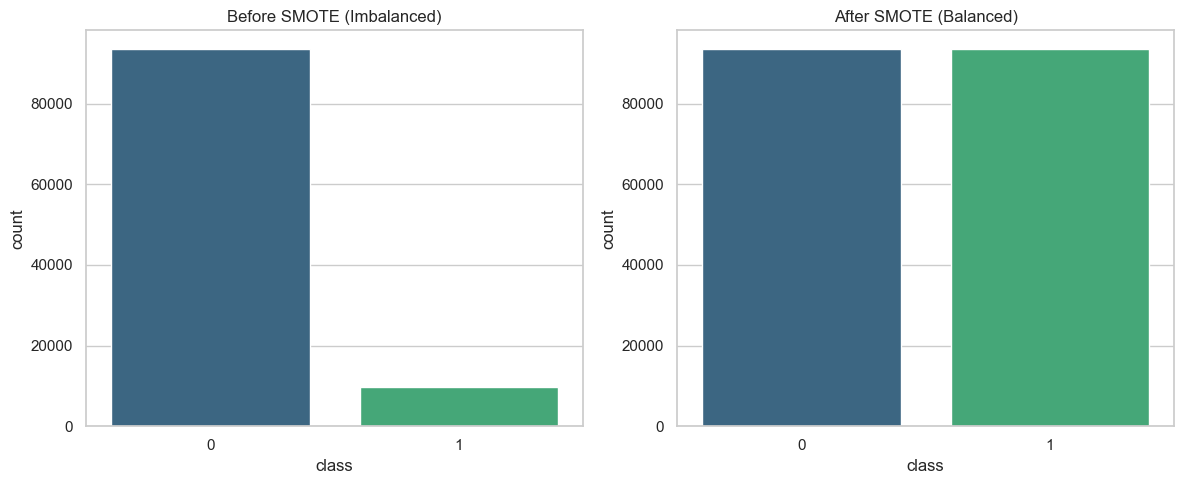

In [40]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot Before SMOTE
sns.countplot(x=y_train, ax=ax[0], palette='viridis')
ax[0].set_title("Before SMOTE (Imbalanced)")

# Plot After SMOTE
sns.countplot(x=y_train_res, ax=ax[1], palette='viridis')
ax[1].set_title("After SMOTE (Balanced)")

plt.tight_layout()
plt.show()

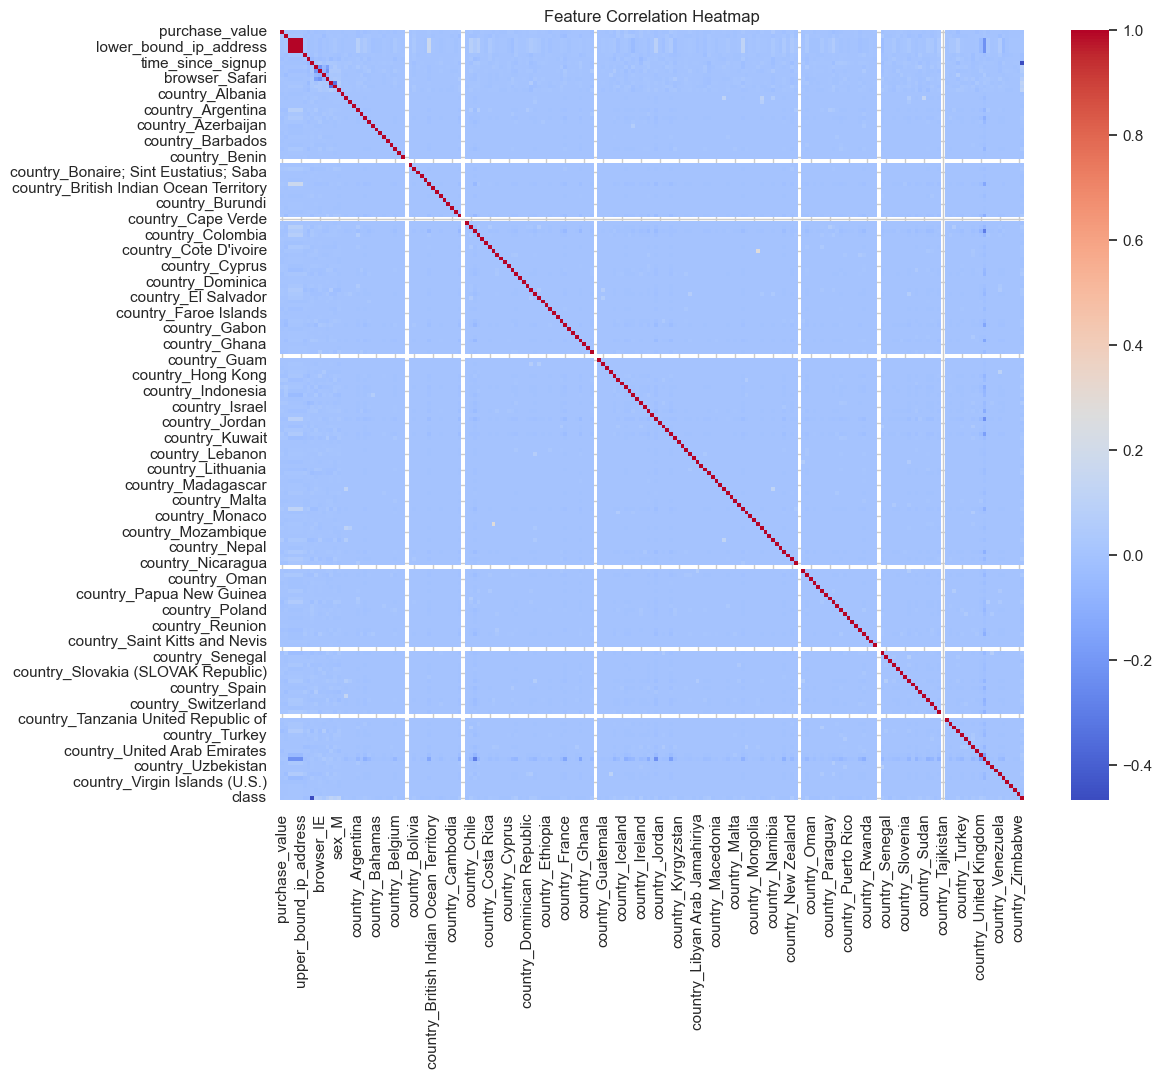

In [41]:
# Select a subset of features to check correlation
plt.figure(figsize=(12, 10))
correlation_matrix = pd.concat([X_train_res, y_train_res], axis=1).corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()